#                             Voice Separation

In [9]:
import os
print (os.getcwd() )
os.chdir("E:\Cocktail-Party-Problem-master")

E:\Cocktail-Party-Problem-master


In [10]:
!pip install pydub
from pydub import AudioSegment
import IPython
import numpy as np
import wave

mix_1_wave = wave.open('./sounds/mixedX.wav','r')

You should consider upgrading via the 'C:\Users\sindh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
mix_1_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=32000, nframes=506880, comptype='NONE', compname='not compressed')

In [12]:
294720/48000

6.14

Let's extract the frames of the wave file, which will be a part of the dataset we'll run ICA against:

In [13]:
# Extract Raw Audio from Wav File
signal_1_raw = mix_1_wave.readframes(-1)


In [14]:
#signal_1_raw

In [15]:
signal_1 = np.frombuffer(signal_1_raw,dtype=np.int16)
signal_1
signal_1.size

506880

signal_1 is now a list of ints representing the sound contained in the first file.

In [16]:
'length: ', len(signal_1) , 'first 100 elements: ',signal_1[:200]

('length: ',
 506880,
 'first 100 elements: ',
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], dtype=int16))

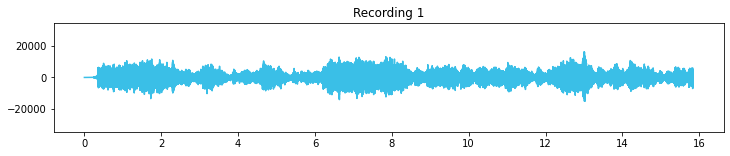

In [17]:
import matplotlib.pyplot as plt

fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))


plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

You can hear this recoding below

In the same way, we can now load the other two wave files, and hear then...

In [18]:

mix_2_wave = wave.open('./sounds/mixedY.wav','r')

#Extract Raw Audio from Wav File
signal_raw_2 = mix_2_wave.readframes(-1)


In [19]:
signal_2 = np.frombuffer(signal_raw_2, np.int16)

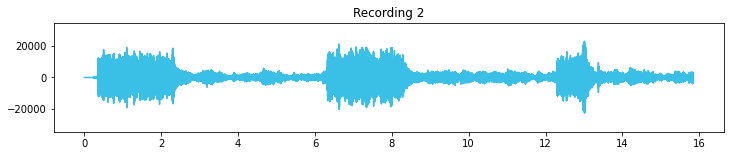

In [20]:
plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

# Listening Audio

In [21]:
IPython.display.Audio("./sounds/mixedX.wav")

In [22]:
IPython.display.Audio("./sounds/mixedY.wav")

### So you can clearly hear that the recording seems to have multiple different recordings combined

In [23]:
X= list(zip(signal_1, signal_2))
#X2= (zip(signal_1, signal_2))



# Applying FastICA

In [24]:
import sklearn
from sklearn.decomposition import FastICA

# Initializing FastICA with n_components=3
ica = FastICA(n_components=2)


In [25]:

# Running the FastICA algorithm using fit_transform on dataset X
ica_result = ica.fit_transform(X)

In [26]:
ica_result.shape

(506880, 2)

Let's split into separate signals and look at them

In [27]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]


# Results

Let's plot to see how the wave forms look

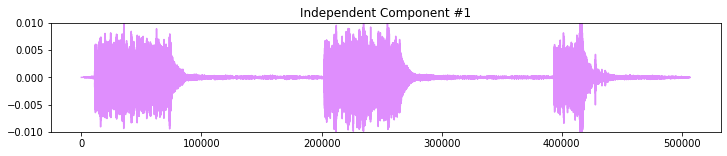

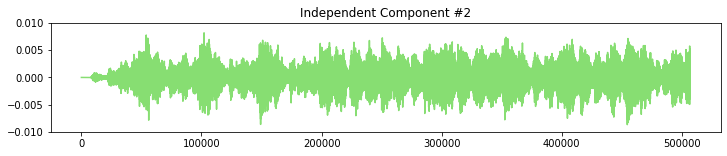

In [28]:
# Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()





In [29]:
from scipy.io import wavfile

# Converting to int, mapping the appropriate range, and increasing the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)



# Writing wave files
wavfile.write("./sounds/result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("./sounds/result_signal_2.wav", fs, result_signal_2_int)


In [30]:
IPython.display.Audio("./sounds/result_signal_1.wav")

In [31]:
IPython.display.Audio("./sounds/result_signal_2.wav")